In [6]:
#抓取瓜子二手车全国直销的销量品牌
import requests
from lxml import etree
import numpy as np
import http.client
import pandas as pd
http.client.HTTPConnection._http_vsn = 10
http.client.HTTPConnection._http_vsn_str = 'HTTP/1.0'
url='https://www.guazi.com/www/buy/'
headers={'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'
    ,'Accept-Encoding': 'gzip, deflate, br'
    ,'Accept-Language': 'zh-CN,zh;q=0.9,en;q=0.8,en-GB;q=0.7,en-US;q=0.6'
    ,'Cache-Control': 'max-age=0'
    ,'Connection': 'keep-alive'
    ,'Host': 'www.guazi.com'
    ,'Referer': 'https: // www.guazi.com / jn / buy /'
    ,'Sec - Fetch - Dest': 'document'
    ,'Sec - Fetch - Mode': 'navigate'
    ,'Sec - Fetch - Site': 'same - origin'
    ,'Sec - Fetch - User': '?1'
    ,'Upgrade - Insecure - Requests': '1'
    ,'Cookie':'uuid=1da464dd-c087-4888-b899-9dd680c07c79; antipas=w0kM69382s2D262ES1S91S76; ganji_uuid=9072089210191042094749; GZ_TOKEN=3536vbGsYGdObyhTV%2FOgmR2agz18AnUk3MrxSMSGbYdEPhLKS0Q3pIRKtsF8HJRa1QPb9wJmzSNLDe0PPqAdLKRcj%2BtZhWmhpPpPwFb7mdD4J5%2FDF1UHMh3wMTvbs9al1TIeipMlaCFKInWc6A; CHDSSO=3536vbGsYGdObyhTV%2FOgmR2agz18AnUk3MrxSMSGbYdEPhLKS0Q3pIRKtsF8HJRa1QPb9wJmzSNLDe0PPqAdLKRcj%2BtZhWmhpPpPwFb7mdD4J5%2FDF1UHMh3wMTvbs9al1TIeipMlaCFKInWc6A; track_id=195189262686916608; guazitrackersessioncadata=%7B%22ca_kw%22%3A%22-%22%7D; sessionid=c971087b-0a73-4627-8d18-1a61032fbc49; lng_lat=116.812471_36.562221; gps_type=1; clueSourceCode=%2A%2300; lg=1; Hm_lvt_bf3ee5b290ce731c7a4ce7a617256354=1617000581,1617012495,1617691954; cainfo=%7B%22ca_a%22%3A%22-%22%2C%22ca_b%22%3A%22-%22%2C%22ca_s%22%3A%22seo_baidu%22%2C%22ca_n%22%3A%22default%22%2C%22ca_medium%22%3A%22-%22%2C%22ca_term%22%3A%22%25E7%2593%259C%25E5%25AD%2590%25E7%25BD%2591%25E7%2594%25B5%25E8%25AF%259D%22%2C%22ca_content%22%3A%22%22%2C%22ca_campaign%22%3A%22%22%2C%22ca_kw%22%3A%22-%22%2C%22ca_i%22%3A%22-%22%2C%22scode%22%3A%22-%22%2C%22keyword%22%3A%22-%22%2C%22ca_keywordid%22%3A%22210743037634%22%2C%22ca_transid%22%3A%2211421200125074125221%22%2C%22platform%22%3A%221%22%2C%22version%22%3A1%2C%22track_id%22%3A%22195189262686916608%22%2C%22guid%22%3A%221da464dd-c087-4888-b899-9dd680c07c79%22%2C%22display_finance_flag%22%3A%22-%22%2C%22client_ab%22%3A%22-%22%2C%22sessionid%22%3A%22c971087b-0a73-4627-8d18-1a61032fbc49%22%2C%22ca_city%22%3A%22jn%22%7D; isTouFangGuaziIndex=1; cityDomain=www; user_city_id=-1; preTime=%7B%22last%22%3A1617692041%2C%22this%22%3A1617000578%2C%22pre%22%3A1617000578%7D; Hm_lpvt_bf3ee5b290ce731c7a4ce7a617256354=1617692044'
    ,'User - Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36 Edg/89.0.774.68'}
data=requests.get(url,headers=headers).text
tree=etree.HTML(data)
list_1=tree.xpath('/html/body/div[6]/div[2]/dl[1]/dd/div[2]/ul/li/p/a/@href')
list_1_=tree.xpath('/html/body/div[6]/div[2]/dl[1]/dd/div[1]/span[1]/a/@href')
list_2_url1=[]
list_1_url=[]
list_3_url=[]
big_url_list1=[]
big_url_list2=[]
small_url_list=[]
#抓取子品牌url
for i in list_1:
    if i in list_1_[:-2]:
        url_2 = 'https://www.guazi.com'+i
        data_2 = requests.get(url_2, headers=headers).text
        tree_2 = etree.HTML(data_2)
        list_2_ = tree_2.xpath('/html/body/div[6]/div[2]/dl[2]/dd/div[2]/ul/li/p/a/@href')
        big_url_list1.extend(list_2_[2:])
        list_2_url1.extend(list_2_[2:])
    else:#小品牌不抓取
        list_1_url.append(i)
        big_url_list2.append(i)
#抓取每一页的url
for j in list_2_url1:
    url_2_='https://www.guazi.com'+j
    data_3=requests.get(url_2_, headers=headers).text
    tree_3 = etree.HTML(data_3)
    small_url=tree_3.xpath('/html/body/div[6]/ul/li/a/@href')
    if small_url == []:
        continue
    else:
        list_3=tree_3.xpath('/html/body//div[@class="pageBox"]//li/a/@href')
        if list_3 == []:
            continue
        else:
            list_4=tree_3.xpath('/html/body//div[@class="pageBox"]//li/a/span/text()')
            for k in range(eval(list_4[-2])-1):
                url_3_ = list_3[-1]
                data_4 = requests.get('https://www.guazi.com'+url_3_, headers=headers).text
                tree_4 = etree.HTML(data_4)
                big_url_list1.append(url_3_)
                list_3=tree_4.xpath('/html/body//div[@class="pageBox"]//li/a/@href')
print('good')
print(big_url_list1)

good
['/www/ada3xny/c-1h5/#bread', '/www/audi-a4l/c-1h6/#bread', '/www/audi-a3/c-1h6/#bread', '/www/audi-a6l/c-1h6/#bread', '/www/audi-a8l/c-1h6/#bread', '/www/audi-s3/c-1h6/#bread', '/www/audi-a4/c-1h6/#bread', '/www/audi-a6/c-1h6/#bread', '/www/audi-rs3/c-1h6/#bread', '/www/ads4/c-1h6/#bread', '/www/audi-s6/c-1h6/#bread', '/www/ad-a6lxny/c-1h6/#bread', '/www/audi-s8/c-1h6/#bread', '/www/audi-a5/c-1h4/#bread', '/www/audi-tts/c-1h4/#bread', '/www/adtts/c-1h4/#bread', '/www/r8/c-1h4/#bread', '/www/audi-rs5/c-1h4/#bread', '/www/q3jinkou/c-1h2/#bread', '/www/audi-q5-jinkou/c-1h2/#bread', '/www/adq5l/c-1h2/#bread', '/www/audi-q7/c-1h2/#bread', '/www/adq2l/c-1h2/#bread', '/www/adq7xny/c-1h2/#bread', '/www/audi-a7/c-1/#bread', '/www/audi-a8/c-1/#bread', '/www/rs7/c-1/#bread', '/www/audi-s4/c-1/#bread', '/www/audi-s5/c-1/#bread', '/www/ttrs/c-1/#bread', '/www/adq3jk/c-1/#bread', '/www/sq5/c-1/#bread', '/www/audi-s7/c-1/#bread', '/www/audi-rs6/c-1/#bread', '/www/audi-200/c-1/#bread', '/www/jie

In [9]:
url=np.array(big_url_list1)
np.save('./big_url_list1.npy',url)

In [12]:
from lxml import etree
import aiohttp
import asyncio
import nest_asyncio
nest_asyncio.apply()
poolnumber =asyncio.Semaphore(6)
async def get_urls(url):
    with(await poolnumber):
        async with aiohttp.ClientSession() as session:  # 获取session
            async with session.get(url) as response:  # 提出请求
                data=await response.text()
                tree=etree.HTML(data)
                data_=tree.xpath('/html/body/div[6]/ul/li/a')
                for item in data_:
                    small_url=item.xpath('@href')
                    price_data=item.xpath('div[2]/em/text()')
                    time_data=item.xpath('div[1]/text()[1]')
                    diatance_data=item.xpath('div[1]/text()[2]')
                    small_url_list.append([str(small_url)[2:-2],str(price_data)[2:-3],str(time_data)[2:-3],str(diatance_data)[2:-5]])
task=[]
for url in big_url_list1:
    url='https://www.guazi.com'+url
    tk=get_urls(url)
    task.append(asyncio.ensure_future(tk))
loop=asyncio.get_event_loop()
loop.run_until_complete(asyncio.wait(task))
exl=pd.DataFrame(small_url_list)

D:\cn\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 'with await lock' is deprecated use 'async with lock' instead
  


In [3]:
exl.to_csv('.\data_guazi1.csv')

NameError: name 'exl' is not defined

In [1]:
import pandas as pd
data_guazi1=pd.read_csv('data_guazi1.csv',index_col=0)

In [2]:
data_guazi1.iloc[2,0]

'/quanzhou/5085128bb0beee4ax.htm#fr_page=list&fr_pos=city&fr_no=1'

In [3]:
data_guazi1.head()

,0,1,2,3
0,/changzhou/5881271297840c1bx.htm#fr_page=list&...,NaN,2009,15.3
1,/km/a5637555f52618bdx.htm#fr_page=list&fr_pos=...,39.49,2019,2.5
2,/quanzhou/5085128bb0beee4ax.htm#fr_page=list&f...,43.40,2016,6.7
3,/nj/4e2533b6c532cfb5x.htm#fr_page=list&fr_pos=...,40.33,2017,4.5
4,/zibo/6a05c78db57c7fcex.htm#fr_page=list&fr_po...,39.49,2019,3.0


In [4]:
kk=[]
from lxml import etree
import aiohttp
import asyncio
import nest_asyncio
import re
nest_asyncio.apply()
poolnumber =asyncio.Semaphore(6)
async def get_urls(url,price_old,time,distance):
    with(await poolnumber):
        async with aiohttp.ClientSession() as session:  # 获取session
            async with session.get(url) as response:  # 提出请求
                data=await response.text()
                tree=etree.HTML(data)
                data_name=tree.xpath('/html/body/div[4]/div[3]/div[2]/h1/text()[1]')
                data_price_now=tree.xpath('/html/body/div[4]/div[3]/div[2]/div[1]/div[2]/span/text()')
                data_price_old=tree.xpath('/html/body/div[4]/div[3]/div[2]/div[1]/div[2]/div/text()')
                data_gear_box=tree.xpath('/html/body/div[4]/div[3]/div[2]/ul/li[5]/span/text()')
                if len(data_gear_box) == 0:
                    data_gear_box=tree.xpath('/html/body/div[4]/div[3]/div[2]/ul/li[4]/span/text()')
                    data_displacement=tree.xpath('/html/body/div[4]/div[3]/div[2]/ul/li[3]/span/text()')
                data_describe1=tree.xpath('/html/body/div[4]/div[@class="basic-infor js-basic-infor js-top"]/ul/li[3]/div/text()[1]')
                data_install=tree.xpath('/html/body/div[4]/div[@class="basic-infor js-basic-infor js-top"]/ul/li[6]/div/text()[1]')
                data_model=re.findall("class='td1'>级别</td><td width='50%' class='td2'>(.*?)</td>",data)
                data_mali=re.findall("最大马力.*?<td width='50%' class='td2'>(.*?)</td>",data)
                data_oil=re.findall("燃油标号.*? class='td2'>(.*?)号</td>",data)
                data_weight=re.findall("整备质量.*?</td><td width='50%' class='td2'>(.*?)</td>",data)
                data_inter = re.findall("进气形式.*?</td><td width='50%' class='td2'>(.*?)</td>",data)
                data_construction=re.findall("车身结构</td><td width='50%' class='td2'>(.*?)</td>",data)
                data_gang=re.findall("气缸数</td><td width='50%' class='td2'>(.*?)缸</td>",data)
                data_yaoshi=re.findall("无钥匙启动</td><td width='50%' class='td2'>(.*?)</td>",data)
                data_oil_type=re.findall("燃料类型</td><td width='50%' class='td2'>(.*?)</td>",data)
                data_zuoyi =re.findall("真皮座椅</td><td width='50%' class='td2'>(.*?)</td>",data)
                data_daocheleida=re.findall("倒车雷达</td><td width='50%' class='td2'>(.*?)</td>",data)
                yy=[str(data_name)[0:-40],price_old,time,distance,str(data_price_now)[2:-3],str(data_price_old)[4:-3],str(data_gear_box)[2:-2],str(data_displacement)[2:-2]
                    ,str(data_describe1)[2:-14],str(data_install)[2:-21],str(data_model)[2:-2],str(data_mali)[2:-2],str(data_oil)[2:-2]
                    ,str(data_weight)[2:-2],str(data_inter)[2:-2],str(data_construction)[2:-2],str(data_gang)[2:-2],str(data_yaoshi)[2:-2]
                    ,str(data_oil_type)[2:-2],str(data_zuoyi)[2:-2],str(data_daocheleida)[2:-2]]
                kk.append(yy)
task=[]
for  url,price_old,time,distance in list(data_guazi1.values):
    url='https://www.guazi.com'+url
    tk=get_urls(url,price_old,time,distance)
    task.append(asyncio.ensure_future(tk))
loop=asyncio.get_event_loop() 
loop.run_until_complete(asyncio.wait(task))

D:\cn\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 'with await lock' is deprecated use 'async with lock' instead
  # Remove the CWD from sys.path while we load stuff.


({<Task finished coro=<get_urls() done, defined at <ipython-input-4-9f664a7cd525>:9> result=None>,
  <Task finished coro=<get_urls() done, defined at <ipython-input-4-9f664a7cd525>:9> result=None>,
  <Task finished coro=<get_urls() done, defined at <ipython-input-4-9f664a7cd525>:9> result=None>,
  <Task finished coro=<get_urls() done, defined at <ipython-input-4-9f664a7cd525>:9> result=None>,
  <Task finished coro=<get_urls() done, defined at <ipython-input-4-9f664a7cd525>:9> result=None>,
  <Task finished coro=<get_urls() done, defined at <ipython-input-4-9f664a7cd525>:9> result=None>,
  <Task finished coro=<get_urls() done, defined at <ipython-input-4-9f664a7cd525>:9> result=None>,
  <Task finished coro=<get_urls() done, defined at <ipython-input-4-9f664a7cd525>:9> result=None>,
  <Task finished coro=<get_urls() done, defined at <ipython-input-4-9f664a7cd525>:9> result=None>,
  <Task finished coro=<get_urls() done, defined at <ipython-input-4-9f664a7cd525>:9> exception=UnboundLocalEr

In [5]:
data=pd.DataFrame(kk)

In [7]:
data.to_csv('.\guazi.csv')

In [15]:
data.iloc[:,9:]

,9,10,11,12,13,14,15,16,17,18,19,20
0,3,,,,,,,,,,,
1,2,紧凑型车,290,95,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配
2,0,紧凑型车,290,95,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配
3,3,紧凑型车,290,95,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配
4,0,紧凑型车,290,95,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配
5,1,紧凑型车,286,95,1505,涡轮增压,4门5座三厢车,4,选配,汽油,标配,标配
6,4,紧凑型车,286,95,1505,涡轮增压,4门5座三厢车,4,选配,汽油,标配,标配
7,4,紧凑型车,286,95,1505,涡轮增压,4门5座三厢车,4,选配,汽油,标配,标配
8,3,紧凑型车,290,95,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配
9,5,紧凑型车,290,95,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配


In [16]:
data.columns=['品牌','原价/万元','上牌时间/年','表里程/万公里','目前价格','折扣前价格','变速箱','排量','标准'
              ,'几次交易','车型','马力','燃油标号','整备质量(kg)','进气形式','车身结构','气缸数量','无钥匙启动','燃料类型','真皮座椅'
              ,'倒车雷达']

In [18]:
data.iloc[:,-1].unique()

array(['', '标配', '选配', '-'], dtype=object)

In [19]:
data.to_csv('.\data.csv')

## 平台二手车品牌在售数量初步了解二手车品牌市场哪系车市场份额度最大
## 平台二手车车型在售数量初步了解二手车品牌市场哪种车型市场份额度最大

In [1]:
### 数据初步预处理

In [2]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('data.csv',index_col=0)

In [4]:
data.shape

(46674, 21)

In [5]:
data.columns

Index(['品牌', '原价/万元', '上牌时间/年', '表里程/万公里', '目前价格', '折扣前价格', '变速箱', '排量', '标准',
       '几次交易', '车型', '马力', '燃油标号', '整备质量(kg)', '进气形式', '车身结构', '气缸数量', '无钥匙启动',
       '燃料类型', '真皮座椅', '倒车雷达'],
      dtype='object')

In [6]:
# 删除重复值
data.drop_duplicates(keep='first',inplace=True)

In [7]:
data.shape

(45265, 21)

In [8]:
data.dropna(subset=['品牌','上牌时间/年','表里程/万公里','目前价格','变速箱','排量','标准'
              ,'几次交易','车型','马力','燃油标号','整备质量(kg)','进气形式','车身结构','气缸数量','无钥匙启动','燃料类型','真皮座椅'
              ,'倒车雷达'],inplace=True)

In [9]:
data.shape

(44368, 21)

In [10]:
data.index=range(data.shape[0])

In [11]:
data.iloc[:,2].unique()
data.iloc[:,5].unique()
data.iloc[:,6].unique()
data.iloc[:,7].unique()
data.iloc[:,8].unique()
data.iloc[:,9].unique()
data.iloc[:,11].unique()
data.iloc[:,13].unique()
data.iloc[:,14].unique()
data.iloc[:,15].unique()
data.iloc[:,16].unique()
data.iloc[:,17].unique()
data.iloc[:,18].unique()
data.iloc[:,19].unique()

array(['标配', '-'], dtype=object)

In [12]:
data.isnull().sum()

品牌              0
原价/万元        5584
上牌时间/年          0
表里程/万公里         0
目前价格            0
折扣前价格       29918
变速箱             0
排量              0
标准              0
几次交易            0
车型              0
马力              0
燃油标号            0
整备质量(kg)        0
进气形式            0
车身结构            0
气缸数量            0
无钥匙启动           0
燃料类型            0
真皮座椅            0
倒车雷达            0
dtype: int64

In [13]:
data.drop('折扣前价格',axis=1,inplace=True)

In [14]:
#品牌处理
logo_list = []
for i in data.iloc[:,0]:
    logo = str(i)
    logo = logo.strip()
    logo_list.append(logo[14:-4])
data.iloc[:,0]=logo_list

In [15]:
data.head()

,品牌,原价/万元,上牌时间/年,表里程/万公里,目前价格,变速箱,排量,标准,几次交易,车型,马力,燃油标号,整备质量(kg),进气形式,车身结构,气缸数量,无钥匙启动,燃料类型,真皮座椅,倒车雷达
0,奥迪S3 2017款 改款 S3 2.0T Limousine(进口),40.33,2017,4.5,29.80,自动,2.0T,国五,2.0,紧凑型车,290,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配
1,奥迪S3 2019款 S3 2.0T Limousine(进口),39.49,2019,2.5,32.80,自动,2.0T,国五,0.0,紧凑型车,290,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配
2,奥迪S3 2019款 S3 2.0T Limousine(进口),39.49,2019,3.0,31.00,自动,2.0T,国五,3.0,紧凑型车,290,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配
3,奥迪S3 2017款 改款 S3 2.0T Limousine(进口),40.33,2018,7.0,28.35,自动,2.0T,国五,0.0,紧凑型车,290,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配
4,奥迪S3 2015款 S3 2.0T Limousine(进口),43.40,2016,6.7,24.00,自动,2.0T,国五,1.0,紧凑型车,286,95.0,1505,涡轮增压,4门5座三厢车,4,选配,汽油,标配,标配


In [16]:
logo_list_ = []
for i in data.iloc[:,0]:
    logo_ = str(i)
    logo_ = logo_[:2]
    logo_list_.append(logo_)
data['logo']=logo_list_

In [17]:
data['logo'].unique()

array(['奥迪', '本田', '别克', '宝马', '奔驰', '大众', '丰田', '福特', '哈弗', '吉利', '日产',
       '现代', '雪佛'], dtype=object)

In [18]:
logo_list_ = []
for i in data.iloc[:,0]:
    logo_ = str(i)
    logo_ = logo_[:2]
    logo_list_.append(logo_)
data['logo']=logo_list_

In [19]:
list_1=[]
for i in range(len(data[data.logo=='雪佛'])):
    logo = '雪佛兰'
    list_1.append(logo)
data.loc[data.logo=='雪佛','logo']=list_1

In [20]:
data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99])

,原价/万元,上牌时间/年,表里程/万公里,几次交易,燃油标号
count,38784.000000,44368.000000,44368.000000,44368.000000,44368.000000
mean,27.078638,2016.410904,5.998693,0.733592,93.224013
std,18.232789,2.278983,3.952163,0.990079,2.774126
min,4.320000,2008.000000,0.100000,0.000000,0.000000
1%,8.120000,2010.000000,0.500000,0.000000,92.000000
10%,11.700000,2013.000000,1.800000,0.000000,92.000000
25%,14.960000,2015.000000,3.200000,0.000000,92.000000
50%,22.120000,2017.000000,5.400000,0.000000,92.000000
75%,33.640000,2018.000000,8.000000,1.000000,95.000000
90%,47.280000,2019.000000,10.900000,2.000000,95.000000


In [21]:
group_logo=data.groupby(by='logo')
group_logo.size()

logo
丰田     3839
别克     3923
吉利     1551
哈弗      764
大众     9118
奔驰     4128
奥迪     3316
宝马     4435
日产     2701
本田     4222
现代     2346
福特     2256
雪佛兰    1769
dtype: int64

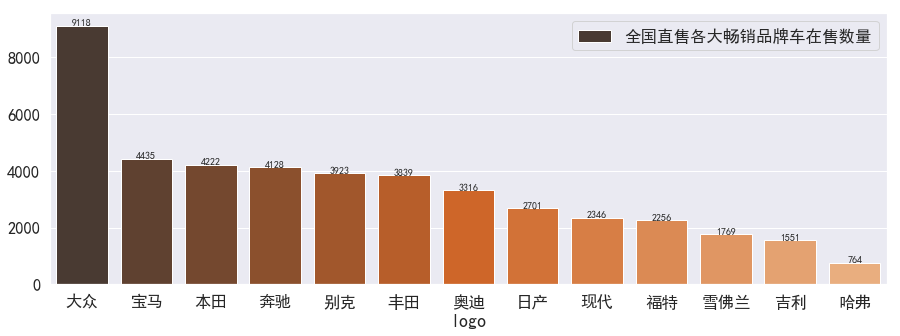

In [22]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
import seaborn as sns
sns.set(font='SimHei',font_scale=1.5)  # 解决Seaborn中文显示问题并调整字体大小
plt.figure(figsize=(15,5))
sns.barplot(group_logo.size().sort_values(ascending=False).index
            ,group_logo.size().sort_values(ascending=False).values,palette='Oranges_d'
            ,label=('全国直售各大畅销品牌车在售数量'))
for x,y in enumerate(group_logo.size().sort_values(ascending=False).values):
    plt.text(x,y,'%s'%round(y,2),ha='center',fontsize=10)
plt.legend(loc='best')
plt.show()

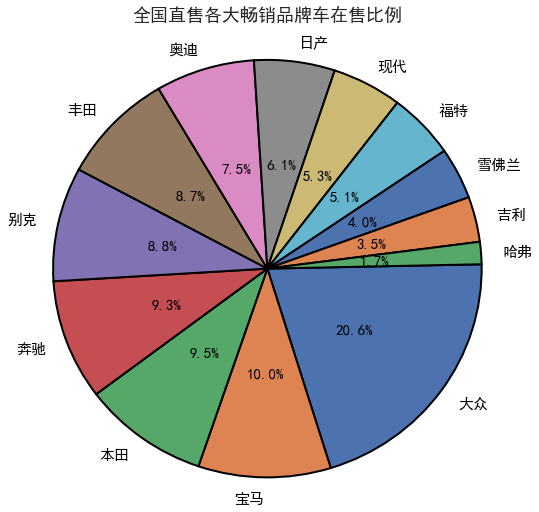

In [23]:
plt.figure(figsize=(8,8))
plt.pie(x=group_logo.size().sort_values(ascending=False).values,labels=group_logo.size().sort_values(ascending=False).index,autopct='%1.1f%%',pctdistance=0.5,labeldistance=1.1,\
        startangle=1.2,radius=1.2,counterclock=False,wedgeprops=\
        {'linewidth':2,'edgecolor':'black'},textprops={'fontsize':15,'color':'black'})
plt.title('全国直售各大畅销品牌车在售比例',pad=30)
plt.show()

In [24]:
data.index = range(data.shape[0])

In [25]:
data.shape

(44368, 21)

In [26]:
data.isnull().mean()

品牌          0.000000
原价/万元       0.125856
上牌时间/年      0.000000
表里程/万公里     0.000000
目前价格        0.000000
变速箱         0.000000
排量          0.000000
标准          0.000000
几次交易        0.000000
车型          0.000000
马力          0.000000
燃油标号        0.000000
整备质量(kg)    0.000000
进气形式        0.000000
车身结构        0.000000
气缸数量        0.000000
无钥匙启动       0.000000
燃料类型        0.000000
真皮座椅        0.000000
倒车雷达        0.000000
logo        0.000000
dtype: float64

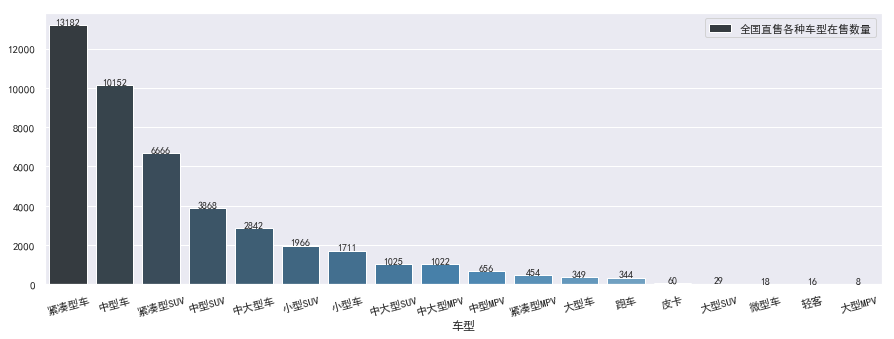

In [27]:
group_model = data.groupby(by='车型')
sns.set(font='SimHei',font_scale=1)  # 解决Seaborn中文显示问题并调整字体大小
plt.figure(figsize=(15,5))
sns.barplot(group_model.size().sort_values(ascending=False).index
            ,group_model.size().sort_values(ascending=False).values,palette='Blues_d'
            ,label=('全国直售各种车型在售数量'))
for x,y in enumerate(group_model.size().sort_values(ascending=False).values):
    plt.text(x,y,'%s'%round(y,2),ha='center',fontsize=10)
plt.xticks(rotation=15)
plt.legend(loc='best')
plt.show()

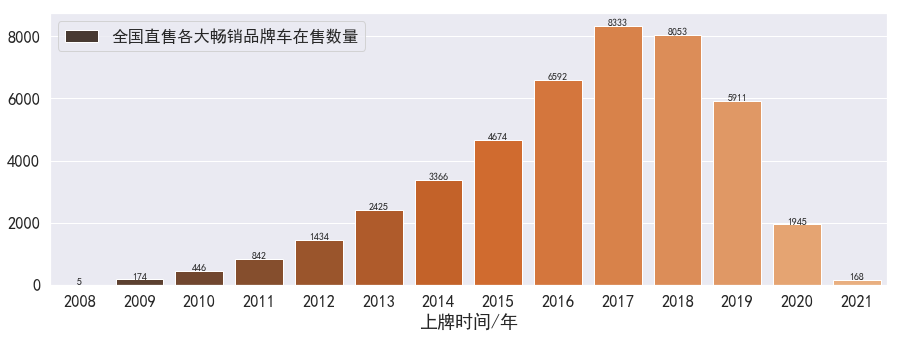

In [28]:
group_time = data.groupby(by='上牌时间/年')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
import seaborn as sns
sns.set(font='SimHei',font_scale=1.5)  # 解决Seaborn中文显示问题并调整字体大小
plt.figure(figsize=(15,5))
sns.barplot(group_time.size().index
            ,group_time.size().values,palette='Oranges_d'
            ,label=('全国直售各大畅销品牌车在售数量'))
for x,y in enumerate(group_time.size().values):
    plt.text(x,y,'%s'%round(y,2),ha='center',fontsize=10)
plt.legend(loc='best')
plt.show()

## 根据交易情况，了解哪个车品牌多次交易记录比例最多，即车主出手欲望最高

In [29]:
data.head()

,品牌,原价/万元,上牌时间/年,表里程/万公里,目前价格,变速箱,排量,标准,几次交易,车型,...,燃油标号,整备质量(kg),进气形式,车身结构,气缸数量,无钥匙启动,燃料类型,真皮座椅,倒车雷达,logo
0,奥迪S3 2017款 改款 S3 2.0T Limousine(进口),40.33,2017,4.5,29.80,自动,2.0T,国五,2.0,紧凑型车,...,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配,奥迪
1,奥迪S3 2019款 S3 2.0T Limousine(进口),39.49,2019,2.5,32.80,自动,2.0T,国五,0.0,紧凑型车,...,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配,奥迪
2,奥迪S3 2019款 S3 2.0T Limousine(进口),39.49,2019,3.0,31.00,自动,2.0T,国五,3.0,紧凑型车,...,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配,奥迪
3,奥迪S3 2017款 改款 S3 2.0T Limousine(进口),40.33,2018,7.0,28.35,自动,2.0T,国五,0.0,紧凑型车,...,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配,奥迪
4,奥迪S3 2015款 S3 2.0T Limousine(进口),43.40,2016,6.7,24.00,自动,2.0T,国五,1.0,紧凑型车,...,95.0,1505,涡轮增压,4门5座三厢车,4,选配,汽油,标配,标配,奥迪


In [30]:
data.iloc[:,8]=pd.to_numeric(data.iloc[:,8],errors='coerce')

In [31]:
data.head()

,品牌,原价/万元,上牌时间/年,表里程/万公里,目前价格,变速箱,排量,标准,几次交易,车型,...,燃油标号,整备质量(kg),进气形式,车身结构,气缸数量,无钥匙启动,燃料类型,真皮座椅,倒车雷达,logo
0,奥迪S3 2017款 改款 S3 2.0T Limousine(进口),40.33,2017,4.5,29.80,自动,2.0T,国五,2.0,紧凑型车,...,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配,奥迪
1,奥迪S3 2019款 S3 2.0T Limousine(进口),39.49,2019,2.5,32.80,自动,2.0T,国五,0.0,紧凑型车,...,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配,奥迪
2,奥迪S3 2019款 S3 2.0T Limousine(进口),39.49,2019,3.0,31.00,自动,2.0T,国五,3.0,紧凑型车,...,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配,奥迪
3,奥迪S3 2017款 改款 S3 2.0T Limousine(进口),40.33,2018,7.0,28.35,自动,2.0T,国五,0.0,紧凑型车,...,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配,奥迪
4,奥迪S3 2015款 S3 2.0T Limousine(进口),43.40,2016,6.7,24.00,自动,2.0T,国五,1.0,紧凑型车,...,95.0,1505,涡轮增压,4门5座三厢车,4,选配,汽油,标配,标配,奥迪


In [32]:
group_logo['几次交易'].mean()

logo
丰田     0.719198
别克     0.728014
吉利     0.479691
哈弗     0.530105
大众     0.680961
奔驰     1.024952
奥迪     0.913450
宝马     0.916122
日产     0.613476
本田     0.647560
现代     0.630861
福特     0.566489
雪佛兰    0.622386
Name: 几次交易, dtype: float64

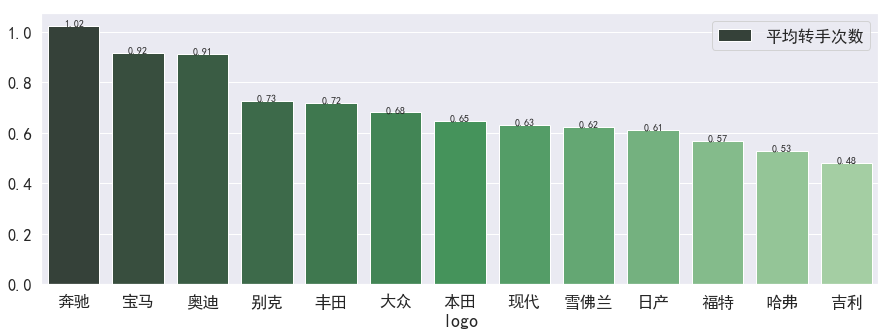

In [33]:
sns.set(font='SimHei',font_scale=1.5)  # 解决Seaborn中文显示问题并调整字体大小
plt.figure(figsize=(15,5))
sns.barplot(group_logo['几次交易'].mean().sort_values(ascending=False).index
            ,group_logo['几次交易'].mean().sort_values(ascending=False).values,palette='Greens_d'
            ,label=('平均转手次数'))
for x,y in enumerate(group_logo['几次交易'].mean().sort_values(ascending=False).values):
    plt.text(x,y,'%s'%round(y,2),ha='center',fontsize=10)
plt.legend(loc='best')
plt.show()

## 市场情况评估各车品牌的平均保值率

In [34]:
data_2 = data.copy()

In [35]:
data_2.head()

,品牌,原价/万元,上牌时间/年,表里程/万公里,目前价格,变速箱,排量,标准,几次交易,车型,...,燃油标号,整备质量(kg),进气形式,车身结构,气缸数量,无钥匙启动,燃料类型,真皮座椅,倒车雷达,logo
0,奥迪S3 2017款 改款 S3 2.0T Limousine(进口),40.33,2017,4.5,29.80,自动,2.0T,国五,2.0,紧凑型车,...,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配,奥迪
1,奥迪S3 2019款 S3 2.0T Limousine(进口),39.49,2019,2.5,32.80,自动,2.0T,国五,0.0,紧凑型车,...,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配,奥迪
2,奥迪S3 2019款 S3 2.0T Limousine(进口),39.49,2019,3.0,31.00,自动,2.0T,国五,3.0,紧凑型车,...,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配,奥迪
3,奥迪S3 2017款 改款 S3 2.0T Limousine(进口),40.33,2018,7.0,28.35,自动,2.0T,国五,0.0,紧凑型车,...,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配,奥迪
4,奥迪S3 2015款 S3 2.0T Limousine(进口),43.40,2016,6.7,24.00,自动,2.0T,国五,1.0,紧凑型车,...,95.0,1505,涡轮增压,4门5座三厢车,4,选配,汽油,标配,标配,奥迪


In [36]:
data_2.dropna(subset=['原价/万元'],inplace=True)

In [37]:
data_2.shape

(38784, 21)

In [38]:
for i in [1,4]:
    data_2.iloc[:,i]=pd.to_numeric(data_2.iloc[:,i],errors='coerce')

In [39]:
data_2.isnull().mean()

品牌          0.000000
原价/万元       0.000000
上牌时间/年      0.000000
表里程/万公里     0.000000
目前价格        0.003532
变速箱         0.000000
排量          0.000000
标准          0.000000
几次交易        0.000000
车型          0.000000
马力          0.000000
燃油标号        0.000000
整备质量(kg)    0.000000
进气形式        0.000000
车身结构        0.000000
气缸数量        0.000000
无钥匙启动       0.000000
燃料类型        0.000000
真皮座椅        0.000000
倒车雷达        0.000000
logo        0.000000
dtype: float64

In [40]:
data_2.dropna(subset=['目前价格'],inplace=True)

In [41]:
data_2.shape

(38647, 21)

In [42]:
data_2.loc[:,'loss'] = data_2.loc[:,'目前价格']/data_2.loc[:,'原价/万元']

In [43]:
group_loss=data_2.groupby(by='logo')

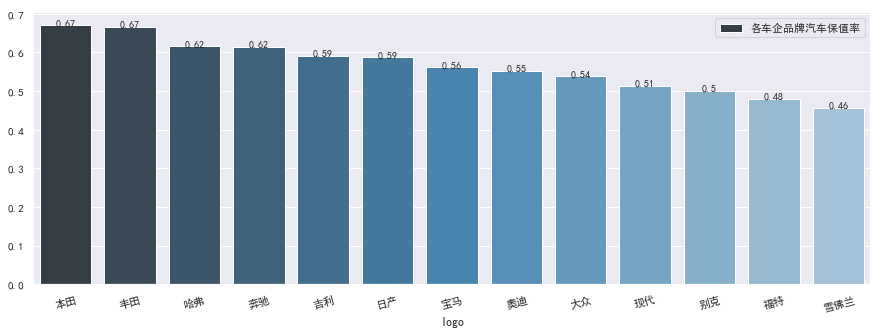

In [44]:
sns.set(font='SimHei',font_scale=1)  # 解决Seaborn中文显示问题并调整字体大小
plt.figure(figsize=(15,5))
sns.barplot(group_loss['loss'].mean().sort_values(ascending=False).index
            ,group_loss['loss'].mean().sort_values(ascending=False).values,palette='Blues_d'
            ,label=('各车企品牌汽车保值率'))
for x,y in enumerate(group_loss['loss'].mean().sort_values(ascending=False).values):
    plt.text(x,y,'%s'%round(y,2),ha='center',fontsize=10)
plt.xticks(rotation=15)
plt.legend(loc='best')
plt.show()

In [45]:
group_1=data_2[data_2['上牌时间/年']==2015].groupby(by='logo')
group_2=data_2[data_2['上牌时间/年']==2016].groupby(by='logo')
group_3=data_2[data_2['上牌时间/年']==2017].groupby(by='logo')
group_4=data_2[data_2['上牌时间/年']==2018].groupby(by='logo')
group_5=data_2[data_2['上牌时间/年']==2019].groupby(by='logo')

In [46]:
group_1['loss'].mean().index

Index(['丰田', '别克', '吉利', '哈弗', '大众', '奔驰', '奥迪', '宝马', '日产', '本田', '现代', '福特',
       '雪佛兰'],
      dtype='object', name='logo')

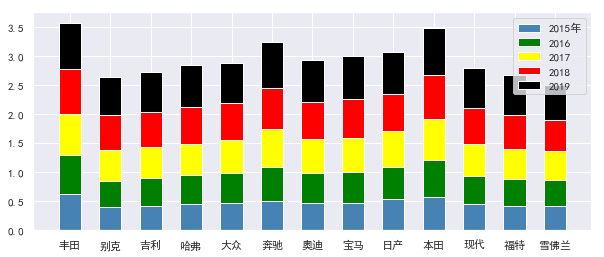

In [47]:
plt.figure(figsize=(10,4))
plt.bar(x=range(len(group_1)),height=group_1['loss'].mean().values,color='steelblue',label='2015年',tick_label=group_1['loss'].mean().index,width=0.55)
plt.bar(x=range(len(group_1)),height=group_2['loss'].mean().values,color='green',label='2016',tick_label=group_1['loss'].mean().index,width=0.55,bottom=group_1['loss'].mean().values)
plt.bar(x=range(len(group_1)),height=group_3['loss'].mean().values,color='yellow',label='2017',tick_label=group_1['loss'].mean().index,width=0.55,bottom=group_1['loss'].mean().values+group_2['loss'].mean().values)
plt.bar(x=range(len(group_1)),height=group_4['loss'].mean().values,color='red',label='2018',tick_label=group_1['loss'].mean().index,width=0.55,bottom=group_1['loss'].mean().values+group_2['loss'].mean().values+group_3['loss'].mean().values)
plt.bar(x=range(len(group_1)),height=group_5['loss'].mean().values,color='black',label='2019',tick_label=group_1['loss'].mean().index,width=0.55,bottom=group_1['loss'].mean().values+group_2['loss'].mean().values+group_3['loss'].mean().values+group_4['loss'].mean().values)
plt.legend()
plt.show()

保值率最高的还是日系车本田，丰田;雪佛兰，福特，别克等美系车保值率低

### 预估车价格保值率

In [48]:
import numpy as np
import xgboost  as xgb
import matplotlib.pyplot as plt
from xgboost import XGBRegressor as XGBR
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split as TTS
from sklearn.model_selection import cross_val_score as CVS

In [49]:
#XGBOOST补全原车价格
data_3=data.copy()

In [50]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44368 entries, 0 to 44367
Data columns (total 21 columns):
品牌          44368 non-null object
原价/万元       38784 non-null float64
上牌时间/年      44368 non-null int64
表里程/万公里     44368 non-null float64
目前价格        44368 non-null object
变速箱         44368 non-null object
排量          44368 non-null object
标准          44368 non-null object
几次交易        44368 non-null float64
车型          44368 non-null object
马力          44368 non-null object
燃油标号        44368 non-null float64
整备质量(kg)    44368 non-null object
进气形式        44368 non-null object
车身结构        44368 non-null object
气缸数量        44368 non-null object
无钥匙启动       44368 non-null object
燃料类型        44368 non-null object
真皮座椅        44368 non-null object
倒车雷达        44368 non-null object
logo        44368 non-null object
dtypes: float64(4), int64(1), object(16)
memory usage: 7.1+ MB


In [51]:
data_3.head()

,品牌,原价/万元,上牌时间/年,表里程/万公里,目前价格,变速箱,排量,标准,几次交易,车型,...,燃油标号,整备质量(kg),进气形式,车身结构,气缸数量,无钥匙启动,燃料类型,真皮座椅,倒车雷达,logo
0,奥迪S3 2017款 改款 S3 2.0T Limousine(进口),40.33,2017,4.5,29.80,自动,2.0T,国五,2.0,紧凑型车,...,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配,奥迪
1,奥迪S3 2019款 S3 2.0T Limousine(进口),39.49,2019,2.5,32.80,自动,2.0T,国五,0.0,紧凑型车,...,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配,奥迪
2,奥迪S3 2019款 S3 2.0T Limousine(进口),39.49,2019,3.0,31.00,自动,2.0T,国五,3.0,紧凑型车,...,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配,奥迪
3,奥迪S3 2017款 改款 S3 2.0T Limousine(进口),40.33,2018,7.0,28.35,自动,2.0T,国五,0.0,紧凑型车,...,95.0,1555,涡轮增压,4门5座三厢车,4,标配,汽油,标配,标配,奥迪
4,奥迪S3 2015款 S3 2.0T Limousine(进口),43.40,2016,6.7,24.00,自动,2.0T,国五,1.0,紧凑型车,...,95.0,1505,涡轮增压,4门5座三厢车,4,选配,汽油,标配,标配,奥迪


In [52]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44368 entries, 0 to 44367
Data columns (total 21 columns):
品牌          44368 non-null object
原价/万元       38784 non-null float64
上牌时间/年      44368 non-null int64
表里程/万公里     44368 non-null float64
目前价格        44368 non-null object
变速箱         44368 non-null object
排量          44368 non-null object
标准          44368 non-null object
几次交易        44368 non-null float64
车型          44368 non-null object
马力          44368 non-null object
燃油标号        44368 non-null float64
整备质量(kg)    44368 non-null object
进气形式        44368 non-null object
车身结构        44368 non-null object
气缸数量        44368 non-null object
无钥匙启动       44368 non-null object
燃料类型        44368 non-null object
真皮座椅        44368 non-null object
倒车雷达        44368 non-null object
logo        44368 non-null object
dtypes: float64(4), int64(1), object(16)
memory usage: 7.1+ MB


In [53]:
#处理目前价格变为数字有缺失值的情况
price=[]
for i in data_3.loc[pd.to_numeric(data_3.iloc[:,4],errors='coerce').isnull(),'目前价格']:
    price.append(str(i)[:-28])

In [54]:
data_3.loc[pd.to_numeric(data_3.iloc[:,4],errors='coerce').isnull(),'目前价格']=price

In [55]:
data_3.loc[:,'目前价格']=pd.to_numeric(data_3.iloc[:,4],errors='coerce')

In [56]:
data_3.loc[:,'目前价格'].isnull().sum() 

0

In [57]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44368 entries, 0 to 44367
Data columns (total 21 columns):
品牌          44368 non-null object
原价/万元       38784 non-null float64
上牌时间/年      44368 non-null int64
表里程/万公里     44368 non-null float64
目前价格        44368 non-null float64
变速箱         44368 non-null object
排量          44368 non-null object
标准          44368 non-null object
几次交易        44368 non-null float64
车型          44368 non-null object
马力          44368 non-null object
燃油标号        44368 non-null float64
整备质量(kg)    44368 non-null object
进气形式        44368 non-null object
车身结构        44368 non-null object
气缸数量        44368 non-null object
无钥匙启动       44368 non-null object
燃料类型        44368 non-null object
真皮座椅        44368 non-null object
倒车雷达        44368 non-null object
logo        44368 non-null object
dtypes: float64(5), int64(1), object(15)
memory usage: 7.1+ MB


In [58]:
for i in [10,12,15]:
    data_3.iloc[:,i]=pd.to_numeric(data_3.iloc[:,i],errors='coerce')

In [59]:
data_3.isnull().sum()

品牌             0
原价/万元       5584
上牌时间/年         0
表里程/万公里        0
目前价格           0
变速箱            0
排量             0
标准             0
几次交易           0
车型             0
马力             0
燃油标号           0
整备质量(kg)    6678
进气形式           0
车身结构           0
气缸数量           0
无钥匙启动          0
燃料类型           0
真皮座椅           0
倒车雷达           0
logo           0
dtype: int64

In [60]:
#删除整备质量特征
data_3.drop('整备质量(kg)',axis=1,inplace=True)

In [61]:
data_3.index = range(data_3.shape[0])
data_3.shape

(44368, 20)

In [62]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44368 entries, 0 to 44367
Data columns (total 20 columns):
品牌         44368 non-null object
原价/万元      38784 non-null float64
上牌时间/年     44368 non-null int64
表里程/万公里    44368 non-null float64
目前价格       44368 non-null float64
变速箱        44368 non-null object
排量         44368 non-null object
标准         44368 non-null object
几次交易       44368 non-null float64
车型         44368 non-null object
马力         44368 non-null float64
燃油标号       44368 non-null float64
进气形式       44368 non-null object
车身结构       44368 non-null object
气缸数量       44368 non-null float64
无钥匙启动      44368 non-null object
燃料类型       44368 non-null object
真皮座椅       44368 non-null object
倒车雷达       44368 non-null object
logo       44368 non-null object
dtypes: float64(7), int64(1), object(12)
memory usage: 6.8+ MB


In [64]:
data_3.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99])

,原价/万元,上牌时间/年,表里程/万公里,目前价格,几次交易,马力,燃油标号,气缸数量
count,38784.000000,44368.000000,44368.000000,44368.000000,44368.000000,44368.000000,44368.000000,44368.000000
mean,27.078638,2016.410904,5.998693,14.829542,0.733592,165.515800,93.224013,4.049721
std,18.232789,2.278983,3.952163,10.614965,0.990079,47.991882,2.774126,0.488936
min,4.320000,2008.000000,0.100000,0.600000,0.000000,64.000000,0.000000,3.000000
1%,8.120000,2010.000000,0.500000,3.376700,0.000000,90.000000,92.000000,3.000000
10%,11.700000,2013.000000,1.800000,5.500000,0.000000,110.000000,92.000000,4.000000
25%,14.960000,2015.000000,3.200000,7.580000,0.000000,130.000000,92.000000,4.000000
50%,22.120000,2017.000000,5.400000,11.600000,0.000000,160.000000,92.000000,4.000000
75%,33.640000,2018.000000,8.000000,19.000000,1.000000,186.000000,95.000000,4.000000
90%,47.280000,2019.000000,10.900000,27.580000,2.000000,224.000000,95.000000,4.000000


In [63]:
#独热编码
def OneHot(data):
    OneHot_change = OneHotEncoder(categories="auto").fit(data)
    data=OneHot_change.transform(data)
    return data
def chances(data_):
    data=data_.iloc[:,[5,6,7,9,12,13,15,16,17,18,19]]
    data=OneHot(data)
    return pd.concat((pd.DataFrame(data.toarray()),data_.iloc[:,[2,3,4,8,10,11,14]]),axis=1)
def predict_oldprice(Xtrain,Xtest,Ytrian,Ytest):
    xgb_1=XGBR(n_estimators=100).fit(Xtrain,Ytrian)
    score=xgb_1.score(Xtest,Ytest)
    return score

In [137]:
X=chances(data_3)
y=data_3.iloc[:,1]

In [138]:
X_isnull = X.loc[data_3.iloc[:,1].isnull(),:]

In [139]:
X_notnull=X.loc[data_3.iloc[:,1].notnull(),:]
y_notnull=y[data_3.iloc[:,1].notnull()]

In [140]:
Xtrain,Xtest,Ytrian,Ytest = TTS(X_notnull,y_notnull,test_size=0.3,random_state=120)

In [141]:
predict_oldprice(Xtrain,Xtest,Ytrian.ravel(),Ytest.ravel())#填补缺失值准确率

0.9814494523035238

In [142]:
y[data_3.iloc[:,1].isnull()]=XGBR(n_estimators=100).fit(X_notnull,y_notnull).predict(X_isnull)

In [143]:
data_3.head()

,品牌,原价/万元,上牌时间/年,表里程/万公里,目前价格,变速箱,排量,标准,几次交易,车型,马力,燃油标号,进气形式,车身结构,气缸数量,无钥匙启动,燃料类型,真皮座椅,倒车雷达,logo
0,奥迪S3 2017款 改款 S3 2.0T Limousine(进口),40.33,2017,4.5,29.80,自动,2.0T,国五,2.0,紧凑型车,290.0,95.0,涡轮增压,4门5座三厢车,4.0,标配,汽油,标配,标配,奥迪
1,奥迪S3 2019款 S3 2.0T Limousine(进口),39.49,2019,2.5,32.80,自动,2.0T,国五,0.0,紧凑型车,290.0,95.0,涡轮增压,4门5座三厢车,4.0,标配,汽油,标配,标配,奥迪
2,奥迪S3 2019款 S3 2.0T Limousine(进口),39.49,2019,3.0,31.00,自动,2.0T,国五,3.0,紧凑型车,290.0,95.0,涡轮增压,4门5座三厢车,4.0,标配,汽油,标配,标配,奥迪
3,奥迪S3 2017款 改款 S3 2.0T Limousine(进口),40.33,2018,7.0,28.35,自动,2.0T,国五,0.0,紧凑型车,290.0,95.0,涡轮增压,4门5座三厢车,4.0,标配,汽油,标配,标配,奥迪
4,奥迪S3 2015款 S3 2.0T Limousine(进口),43.40,2016,6.7,24.00,自动,2.0T,国五,1.0,紧凑型车,286.0,95.0,涡轮增压,4门5座三厢车,4.0,选配,汽油,标配,标配,奥迪


In [144]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44368 entries, 0 to 44367
Data columns (total 20 columns):
品牌         44368 non-null object
原价/万元      44368 non-null float64
上牌时间/年     44368 non-null int64
表里程/万公里    44368 non-null float64
目前价格       44368 non-null float64
变速箱        44368 non-null object
排量         44368 non-null object
标准         44368 non-null object
几次交易       44368 non-null float64
车型         44368 non-null object
马力         44368 non-null float64
燃油标号       44368 non-null float64
进气形式       44368 non-null object
车身结构       44368 non-null object
气缸数量       44368 non-null float64
无钥匙启动      44368 non-null object
燃料类型       44368 non-null object
真皮座椅       44368 non-null object
倒车雷达       44368 non-null object
logo       44368 non-null object
dtypes: float64(7), int64(1), object(12)
memory usage: 6.8+ MB


In [145]:
data_3.loc[:,'change'] = data_3.loc[:,'目前价格']/data_3.loc[:,'原价/万元']

In [146]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44368 entries, 0 to 44367
Data columns (total 21 columns):
品牌         44368 non-null object
原价/万元      44368 non-null float64
上牌时间/年     44368 non-null int64
表里程/万公里    44368 non-null float64
目前价格       44368 non-null float64
变速箱        44368 non-null object
排量         44368 non-null object
标准         44368 non-null object
几次交易       44368 non-null float64
车型         44368 non-null object
马力         44368 non-null float64
燃油标号       44368 non-null float64
进气形式       44368 non-null object
车身结构       44368 non-null object
气缸数量       44368 non-null float64
无钥匙启动      44368 non-null object
燃料类型       44368 non-null object
真皮座椅       44368 non-null object
倒车雷达       44368 non-null object
logo       44368 non-null object
change     44368 non-null float64
dtypes: float64(8), int64(1), object(12)
memory usage: 7.1+ MB


In [147]:
data_3.columns

Index(['品牌', '原价/万元', '上牌时间/年', '表里程/万公里', '目前价格', '变速箱', '排量', '标准', '几次交易',
       '车型', '马力', '燃油标号', '进气形式', '车身结构', '气缸数量', '无钥匙启动', '燃料类型', '真皮座椅',
       '倒车雷达', 'logo', 'change'],
      dtype='object')

In [174]:
X =  data_3.loc[:,['原价/万元', '上牌时间/年', '表里程/万公里','变速箱', '排量', '标准', '几次交易',
                   '马力', '燃油标号', '进气形式', '车身结构', '气缸数量', '无钥匙启动', '燃料类型', '真皮座椅',
                   '倒车雷达', 'logo', ]]
y =  data_3.iloc[:,-1].ravel()

In [175]:
X.head()

,原价/万元,上牌时间/年,表里程/万公里,变速箱,排量,标准,几次交易,马力,燃油标号,进气形式,车身结构,气缸数量,无钥匙启动,燃料类型,真皮座椅,倒车雷达,logo
0,40.33,2017,4.5,自动,2.0T,国五,2.0,290.0,95.0,涡轮增压,4门5座三厢车,4.0,标配,汽油,标配,标配,奥迪
1,39.49,2019,2.5,自动,2.0T,国五,0.0,290.0,95.0,涡轮增压,4门5座三厢车,4.0,标配,汽油,标配,标配,奥迪
2,39.49,2019,3.0,自动,2.0T,国五,3.0,290.0,95.0,涡轮增压,4门5座三厢车,4.0,标配,汽油,标配,标配,奥迪
3,40.33,2018,7.0,自动,2.0T,国五,0.0,290.0,95.0,涡轮增压,4门5座三厢车,4.0,标配,汽油,标配,标配,奥迪
4,43.40,2016,6.7,自动,2.0T,国五,1.0,286.0,95.0,涡轮增压,4门5座三厢车,4.0,选配,汽油,标配,标配,奥迪


In [176]:
def chances(data_):
    data=data_.iloc[:,[3,4,5,9,10,12,13,14,15,16]]
    OneHot_change = OneHotEncoder(categories="auto").fit(data)
    data=OneHot_change.transform(data)
    return pd.concat((pd.DataFrame(data.toarray()),data_.iloc[:,[0,1,2,6,7,8,11]]),axis=1)

In [177]:
X=chances(X)

In [178]:
XGBR(n_estimators=100)
CVS(XGBR(n_estimators=100),X,y,cv=10).mean()#初步预测

0.8955534537215515

[12:29:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:29:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:29:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in langu

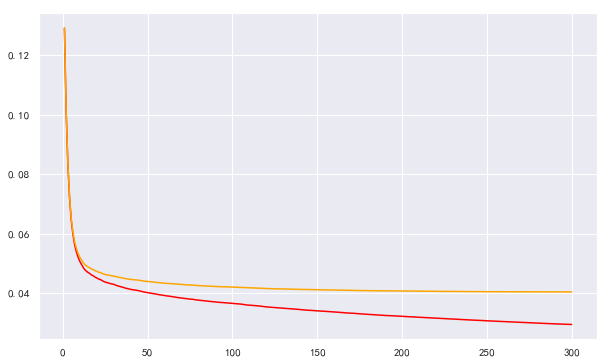

In [179]:
dfull = xgb.DMatrix(X,y)
plt.figure(figsize=(10,6))
param1 = {'silent':False,'obj':'reg:linear',"gamma":0}
score=[]
cvresult1 = xgb.cv(param1,dfull, num_boost_round=300)
plt.plot(range(1,301),cvresult1.iloc[:,0],c="red",label="训练集均方误差")
plt.plot(range(1,301),cvresult1.iloc[:,2],c="orange",label="测试集均方误差")
plt.show()

[12:30:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:30:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:30:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameters a

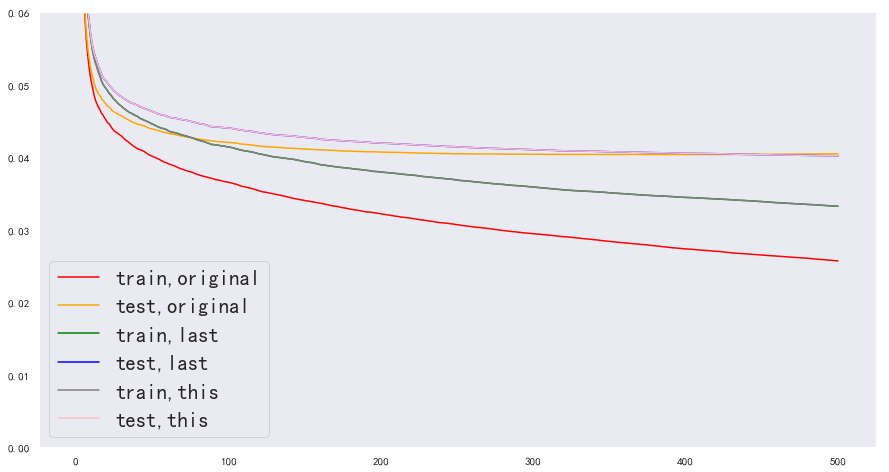

In [180]:
dfull = xgb.DMatrix(X,y)
num_round = 500
param1 = {'silent':True #并非默认
          ,'obj':'reg:linear' #并非默认
          ,"subsample":1
          ,"max_depth":6
          ,"eta":0.3
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bynode":1
          ,"nfold":5}
cvresult1 = xgb.cv(param1, dfull, num_round)
fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=0.06)
ax.grid()
param2 = {'silent':True
          ,'max_depth':5
          ,"eta":0.3
          ,"lambda":10
          ,"colsample_bytree":0.7
          ,"colsample_bylevel":0.8
          }
param3 = {'silent':True
          ,'max_depth':5
          ,"eta":0.3
          ,"lambda":10
          ,"colsample_bytree":0.7
          ,"colsample_bylevel":0.8
          ,"colsample_bynode":1
          }
cvresult2 = xgb.cv(param2, dfull, num_round)
cvresult3 = xgb.cv(param3, dfull, num_round)
ax.plot(range(1,501),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,501),cvresult1.iloc[:,2],c="orange",label="test,original")
ax.plot(range(1,501),cvresult2.iloc[:,0],c="green",label="train,last")
ax.plot(range(1,501),cvresult2.iloc[:,2],c="blue",label="test,last")
ax.plot(range(1,501),cvresult3.iloc[:,0],c="gray",label="train,this")
ax.plot(range(1,501),cvresult3.iloc[:,2],c="pink",label="test,this")
ax.legend(fontsize="xx-large")
plt.show()

### 保存模型

In [181]:
import pickle
param = {'silent':True
         ,'obj':'reg:linear'
         ,'max_depth':5
         ,"eta":0.3
         ,"lambda":10
         ,"colsample_bytree":0.7
         ,"colsample_bylevel":0.8
         ,"colsample_bynode":1
        }
clf = xgb.train(param, dfull, 500)
with open('xgboostonboston.dat', 'wb') as file:
    pickle.dump(clf,file)

[12:31:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [182]:
import pickle
X =  data_3.loc[:,['原价/万元', '上牌时间/年', '表里程/万公里','变速箱', '排量', '标准', '几次交易',
                   '马力', '燃油标号', '进气形式', '车身结构', '气缸数量', '无钥匙启动', '燃料类型', '真皮座椅',
                   '倒车雷达', 'logo', ]]
OneHot_change = OneHotEncoder(categories="auto").fit(X.iloc[:,[3,4,5,9,10,12,13,14,15,16]])
with open('OneHotBotton.dat', 'wb') as file:
    pickle.dump(OneHot_change,file)

### 实例预测

In [166]:
#去不同于瓜子的二手车之家选取一个数据
data_n=[43.22,2015,9,'自动','2.0T','国五',0,180,95,'涡轮增压','4门5座三厢车',4,'标配','汽油','-','-','奥迪']
data_n=pd.DataFrame([data_n],columns=('原价/万元', '上牌时间/年', '表里程/万公里',  '变速箱', '排量', '标准', '几次交易',
                                    '马力', '燃油标号', '进气形式', '车身结构', '气缸数量', '无钥匙启动', '燃料类型', '真皮座椅',
                                    '倒车雷达', 'logo'))
data_n

,原价/万元,上牌时间/年,表里程/万公里,变速箱,排量,标准,几次交易,马力,燃油标号,进气形式,车身结构,气缸数量,无钥匙启动,燃料类型,真皮座椅,倒车雷达,logo
0,43.22,2015,9,自动,2.0T,国五,0,180,95,涡轮增压,4门5座三厢车,4,标配,汽油,-,-,奥迪


In [209]:
def test_n(data_):
    import pickle
    data=data_.iloc[:,[3,4,5,9,10,12,13,14,15,16]]
    OneHot_change=pickle.load(open("OneHotBotton.dat","rb"))
    data=OneHot_change.transform(data)
    data_final=pd.concat((pd.DataFrame(data.toarray()),data_.iloc[:,[0,1,2,6,7,8,11]]),axis=1)
    loaded_model = pickle.load(open("xgboostonboston.dat","rb"))
    data_final = xgb.DMatrix(data_final)
    predict_test=loaded_model.predict(data_final)
    return predict_test

In [212]:
test_n(data_n)

array([0.4454031], dtype=float32)

In [213]:
43.22*0.4454031

19.250321982

####  二手车之家的成交价格为19.5万元与预测价格相差在2500元左右